In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Giriş
Seçtiğimiz veri seti, Kaggle veri setlerinden biri olan happiness  2017 veri setidir. Bu veri seti, aile, ortalama yaşam süresi, ekonomi, cömertlik, hükümete güven, özgürlük ve artık distopya gibi yedi faktöre dayalı olarak dünya çapında 155 ülkenin mutluluk sıralamasını ve mutluluk puanını veriyor. Bu yedi faktörün değerlerinin toplamı bize mutluluk puanını verir ve mutluluk puanı yükseldikçe mutluluk sıralaması düşer. Dolayısıyla, bu yedi faktörün her birinin değeri ne kadar yüksekse, mutluluk seviyesinin de o kadar yüksek olduğu açıktır. Bu faktörlerin anlamını, bu faktörlerin ne ölçüde mutluluğa yol açtığı olarak tanımlayabiliriz. Distopya, ütopyanın zıttıdır ve en düşük mutluluk düzeyine sahiptir. Distopya, diğer ülkelerin mutluluk düzeyi açısından en fakir ülke olmaktan ne kadar uzak olduklarını göstermek için bir referans olarak kabul edilecektir.

## Misyon
Bu işi seçmemin amacı, daha mutlu bir hayat yaşamak için hangi faktörlerin daha önemli olduğunu bulmaktır. Sonuç olarak, insanlar ve ülkeler daha yüksek bir mutluluk düzeyine ulaşmak için daha önemli faktörlere odaklanabilirler. Ayrıca, mutluluk puanını tahmin etmek ve bu belirli veri kümesi için hangi algoritmanın daha iyi çalıştığını keşfetmek için sonucu karşılaştırmak için birkaç makine öğrenimi algoritması uygulayacağım.

In [2]:
df = pd.read_csv("2017.csv")

In [3]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
df.rename(columns={"Country" : "Country",
                   "Happiness.Rank" : "Happiness Rank",
                   "Happiness.Score" : "Happiness Score",
                   "Whisker.high" : "Whisker high",
                   "Whisker.low" : "Whisker low",
                   "Economy..GDP.per.Capita." : "Economy GDP per Capita",
                   "Family" : "Family",
                   "Health..Life.Expectancy." : "Health Life Expectancy",
                   "Freedom" : "Freedom",
                   "Generosity" : "Generosity",
                   "Trust..Government.Corruption." : "Trust Government Corruption",
                   "Dystopia.Residual" : "Dystopia Residual"}, inplace = True)

In [5]:
df.drop(["Whisker high", "Whisker low"], axis=1, inplace=True)

In [6]:
df.head(2)

,Country,Happiness Rank,Happiness Score,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption,Dystopia Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


## Sütun Açıklamaları

* Country: Ülke isimleri
* Happiness Rank: Mutluluk puanına göre ülkenin sıralaması
* Happiness Score: 0'dan 10'a kadar bir ölçekte mutluluk ölçümü
* Economy GDP per Capita:  GDP per capita, bir ülkenin toplam GDP'sinin, nüfusuna bölünmesiyle elde edilen bir değerdir. Yüksek bir GDP per capita değeri, genellikle bir ülkedeki gelir düzeyinin yüksek olduğunu, insanların daha fazla mal ve hizmetlere erişebildiğini ve genel yaşam standardının daha iyi olduğunu gösterir.
* Family: Aile sahibi olmanın önemi
* Health Life Expectancy: Sağlığın önemi ve yaşamayı beklediğiniz süre
* Freedom: Her ülkede özgürlüğün önemi	
* Generosity: Nazik ve cömert olmanın kalitesi
* Trust Government Corruption: Hükümete güven düzeyi ile yolsuzluk arasındaki ilişkiyi ifade eder. 
* Dystopia Residual: Referans olarak oynar

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Economy GDP per Capita,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health Life Expectancy,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust Government Corruption,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308
Dystopia Residual,155.0,1.850238,0.500028,0.377914,1.591291,1.832910,2.144654,3.117485


In [8]:
df.dtypes

Country                         object
Happiness Rank                   int64
Happiness Score                float64
Economy GDP per Capita         float64
Family                         float64
Health Life Expectancy         float64
Freedom                        float64
Generosity                     float64
Trust Government Corruption    float64
Dystopia Residual              float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      155 non-null    object 
 1   Happiness Rank               155 non-null    int64  
 2   Happiness Score              155 non-null    float64
 3   Economy GDP per Capita       155 non-null    float64
 4   Family                       155 non-null    float64
 5   Health Life Expectancy       155 non-null    float64
 6   Freedom                      155 non-null    float64
 7   Generosity                   155 non-null    float64
 8   Trust Government Corruption  155 non-null    float64
 9   Dystopia Residual            155 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.2+ KB


## En Mutlu 10 Ülke

<Axes: xlabel='Happiness Score', ylabel='Country'>

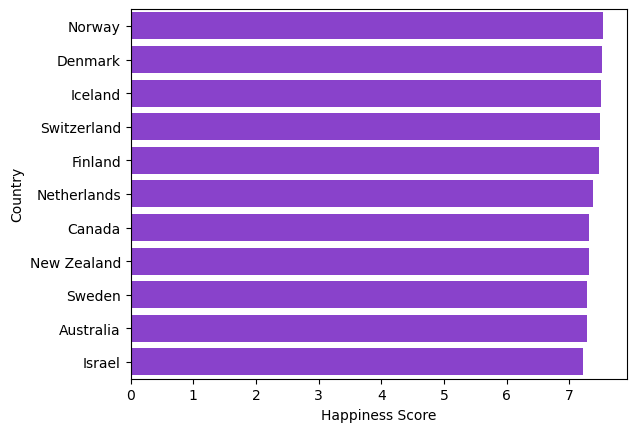

In [10]:
sns.barplot(data=df,
            x=df["Happiness Score"],
            y=df["Country"][:11],
            color = "#8a2be2")

* En mutlu ülkelerin başında Norveç, Danimarka, İzlanda ve İsviçre geliyor.

## Cömertlik ve Mutluluk Puanına Karşı Dünya Mutluluk Raporu

In [11]:
trace1 = go.Scatter(x = df["Happiness Rank"],
                    y = df["Generosity"],
                    mode = "lines",
                    name = "Generosity",
                    marker = dict(color = "#7003ff"), 
                    text = df["Country"])

trace2 = go.Scatter(x = df["Happiness Rank"],
                    y = df["Happiness Score"],
                    mode = "lines+markers",
                    name = "Happiness Score",
                    marker = dict(color = "#ea0f2d"), 
                    text = df["Country"])

data = [trace1, trace2]
layout = dict(title = "Generosity and Happiness Score vs. World Happiness Report",
              xaxis = dict(title= 'Happiness Rank',ticklen= 5,zeroline= False) )

fig = dict(data = data, layout = layout)
iplot(fig)

## Ekonomi ile Mutluluk Puanı Arasındaki İlişki

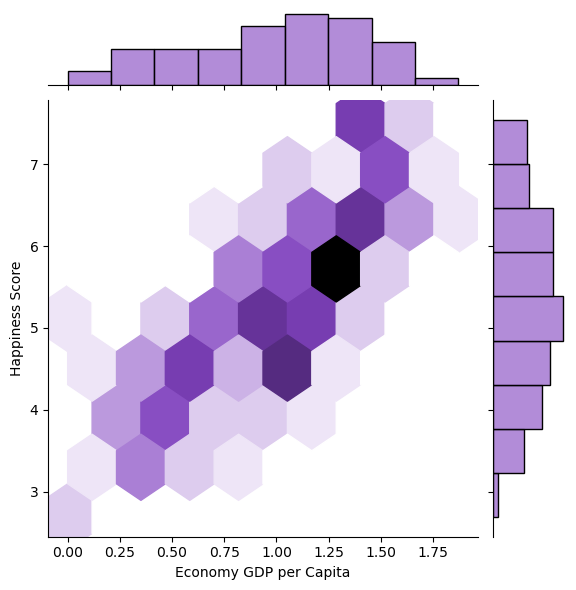

In [12]:
sns.jointplot(data = df, x = "Economy GDP per Capita", y = "Happiness Score", kind = "hex", color = "#9966cc")

## Mutluluk Puanı'nın Aile ile İlişkisi

In [13]:
data = df[["Happiness Score", "Economy GDP per Capita", "Family", "Country"]]

fig = go.Figure()

for x in range(40):
    fig.add_trace(go.Scatter(
        x = [data.iloc[x,:]["Happiness Score"]],
        y = [data.iloc[x,:]["Economy GDP per Capita"]],
        mode = "markers + lines + text",
        text = [data.iloc[x,:]["Country"]],
        textposition="bottom center"
    ))
    
    fig.update_layout(showlegend=False)
fig.show()    

## Mutluluk Puanı'nın Histogramı

<Axes: xlabel='Happiness Score', ylabel='Density'>

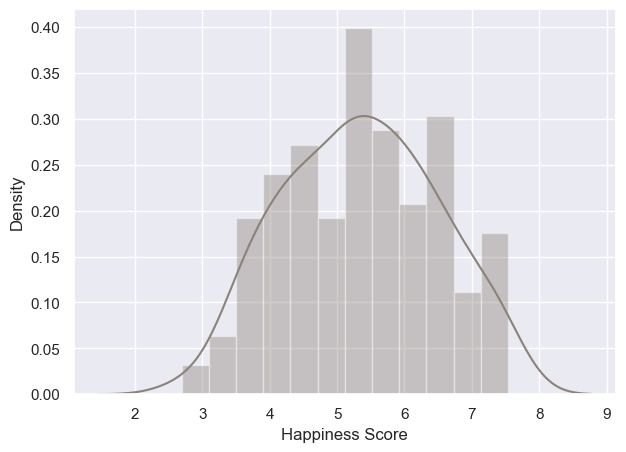

In [14]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(df["Happiness Score"], bins=12, color="#8b8378")

* Histogramdan bimodal dağılım gibi bir şey görebiliriz. Dağıtım kuyrukları eşit değildir yüksek oranda memnun olan insanlar mutsuz olmaktan çok daha fazladır.

## Mutluluk Puanı'nın Coğrafi Görselleştirmesi

In [15]:
data = dict(type = "choropleth", # type: Korelasyon haritasının türü
            locations = df["Country"], # locations: Ülkelerin konum bilgilerini içeren bir dizi
            locationmode = "country names", # locationmode: Konum modu
            colorscale = "RdYlGn", # colorscale: Renk skalası
            z = df["Happiness Score"], # z: Renklendirilecek değerlerin olduğu dizi
            text = df["Country"], # text: Gösterilecek metinlerin olduğu dizi
            colorbar = {"title" : "Happiness Score"}) # colorbar: Renk çubuğu özellikleri

# geo: Coğrafi ayarlar için alt sözlük. 'showframe' özelliği True olarak belirlenmiş ve 
# 'projection' özelliği 'azimuthal equal area' projeksiyonunu kullanacak şekilde belirlenmiştir.
layout = dict(title = "Geographical Visualization of Happiness Score",
              geo = dict(showframe = True, projection = {"type" : "azimuthal equal area"}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)

## Özgürlük ve Yolsuzluk Arasındaki İlişki

Sırada, hükümette yaygın olan Özgürlük ve Yolsuzluk arasındaki ilişki var. Yolsuzluk, tüm insan haklarının - medeni, siyasi, ekonomik, sosyal ve kültürel ve ayrıca gelişme hakkının - gerçekleştirilmesinin önünde çok büyük bir engeldir. Yolsuzluk, şeffaflık, hesap verebilirlik, ayrımcılık yapmama ve topluluk yaşamının her alanına anlamlı katılım gibi temel insan hakları ilkelerini ihlal eder.

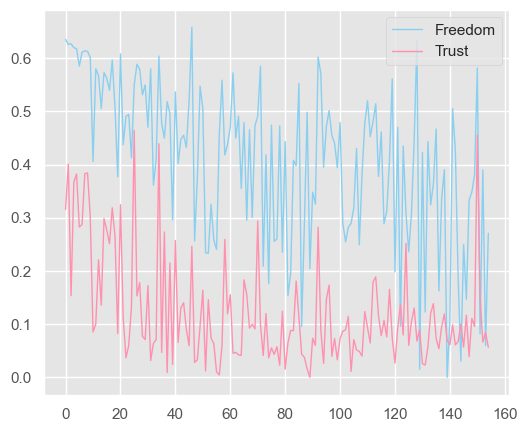

In [16]:
plt.figure(figsize=(6,5))
plt.style.use("ggplot")
df["Freedom"].plot(kind = "line", color = "#89cff0", label = "Freedom", linewidth = 1)
df["Trust Government Corruption"].plot(kind = "line", color = "#ff91af", label = "Trust", linewidth = 1)
plt.legend()
plt.show()

## Renk Ölçeklemeli 3B Dağılım Grafiği ile Mutluluk Derecesi, Aile, Cömertlik Gösterimi

In [17]:
trace1 = go.Scatter3d(x = df["Happiness Rank"],
                      y = df["Family"],
                      z = df["Generosity"],
                      mode = "markers",
                      marker = dict(size = 10,
                                    color = "#fe6f5e"))
data = [trace1]
layout = go.Layout(margin = dict(l = 0,
                                 r = 0,
                                 b = 0,
                                 t = 0)) # margin parametresi, grafik etrafındaki kenar boşluklarını belirler.
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Aykırı Değerlerin Görselleştirilmesi

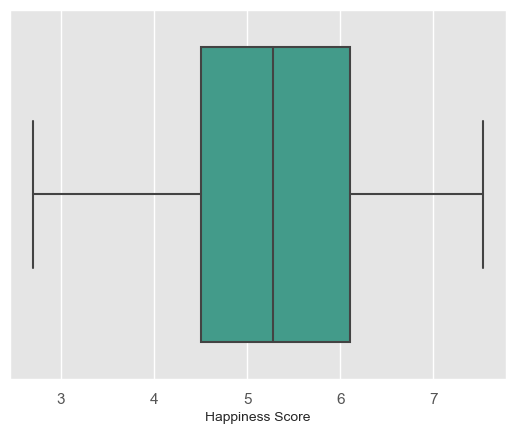

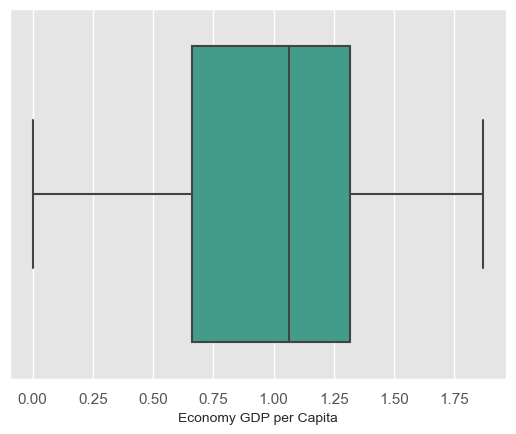

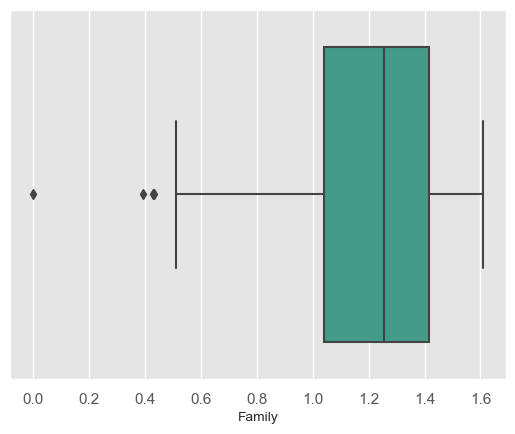

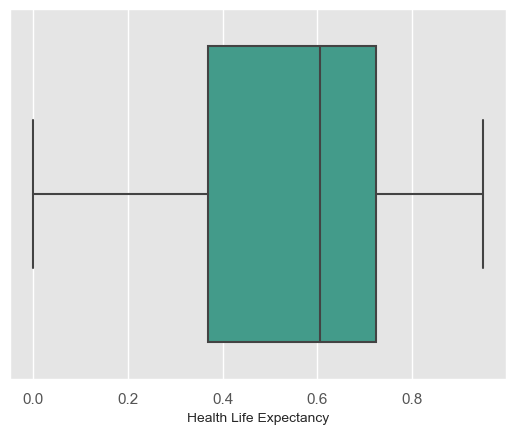

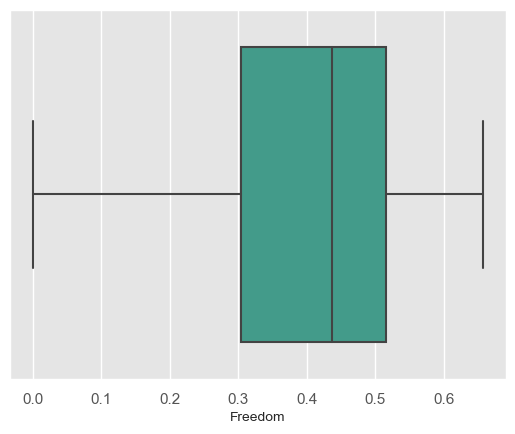

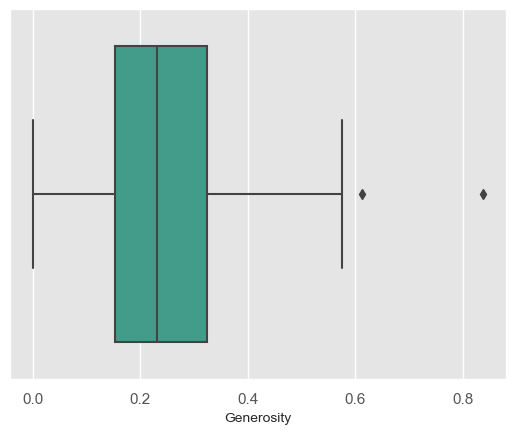

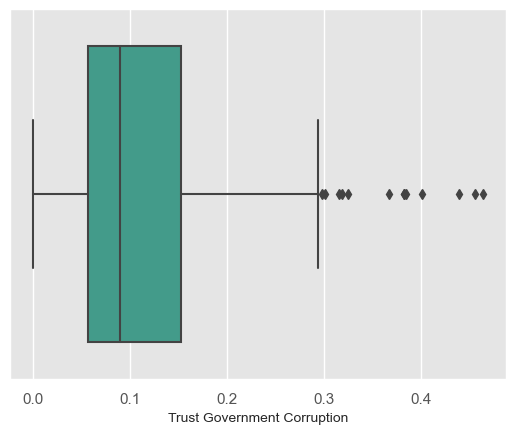

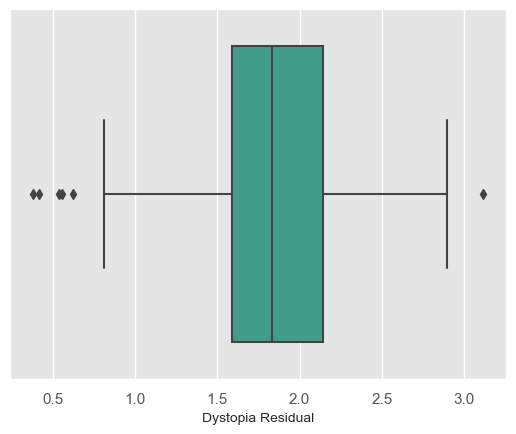

In [18]:
columns = ["Happiness Score", "Economy GDP per Capita", "Family", "Health Life Expectancy", "Freedom", "Generosity",
           "Trust Government Corruption", "Dystopia Residual"]
for col in columns:
    sns.boxplot(x = df[col], color = "#34aa93")
    plt.xlabel(col)
    plt.show()

## Kelime Bulutu

In [19]:
from wordcloud import WordCloud

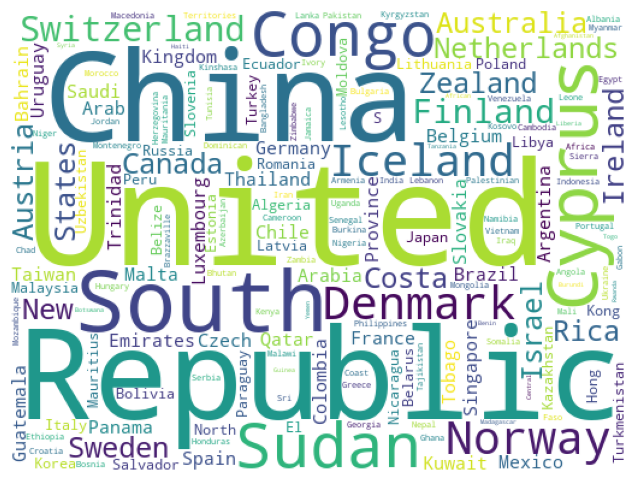

In [20]:
plt.subplots(figsize=(8,6))
wordcloud = WordCloud(background_color="white", width=512, height=384).generate(" ".join(df["Country"]))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("graph.png")
plt.show()

## Korelasyon Matrisi

<Axes: >

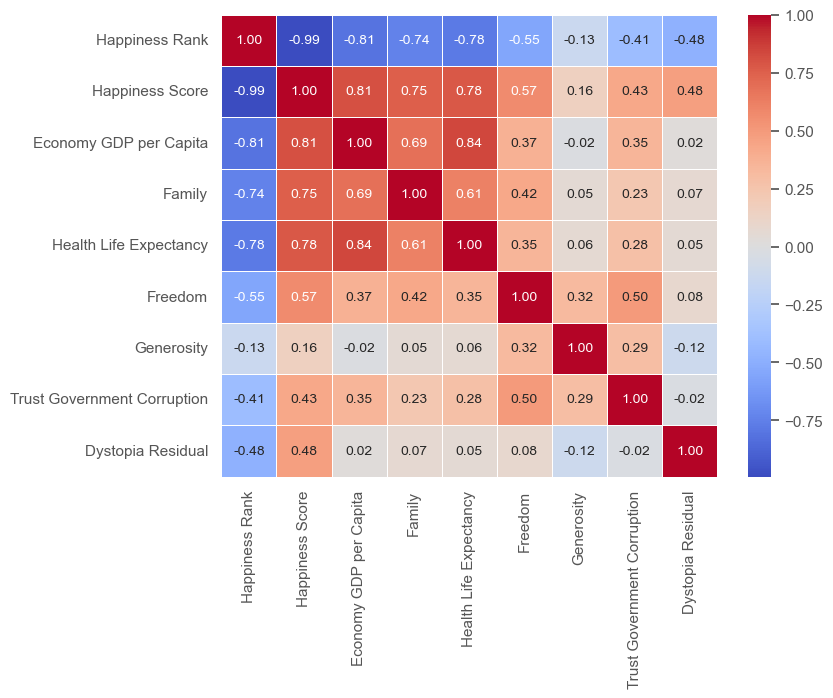

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.7)

* Ekonomi, Aile ve Yaşam Beklentisi'nin Mutluluk puanı ile güçlü bir şekilde ilişkili olduğu görünüyor. Özgürlük ve Mutluluk puanı da iyi bir korelasyona sahiptir, ancak, Özgürlük tüm verilerle oldukça iyi bir korelasyona sahiptir. 

## Makine Öğrenmesi

In [22]:
y = df["Happiness Score"]
X = df[["Economy GDP per Capita", "Family", "Health Life Expectancy", "Freedom",
        "Generosity", "Trust Government Corruption", "Dystopia Residual"]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Modelleri test etmek için önceden tanımlanmış bir işlev oluşturma
def model_fit(model):
    model.fit(X_train, y_train)
    tahmin = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, tahmin)
    print("Ortalama Mutlak Hata: ", round(mae, 4))

### Linear Regression

In [25]:
lr = LinearRegression(n_jobs=10000)
model_fit(lr)

Ortalama Mutlak Hata:  0.0003


### Random Forest Regressor

In [26]:
rf = RandomForestRegressor(n_jobs=1000)
model_fit(rf)

Ortalama Mutlak Hata:  0.2259


### XGBoost

In [27]:
xg = XGBRegressor(learning_rate=0.1, n_estimators=5000)
model_fit(xg)

Ortalama Mutlak Hata:  0.1868


### Decision Tree

In [28]:
df = DecisionTreeRegressor()
model_fit(df)

Ortalama Mutlak Hata:  0.4047


### Bayesian Linear Model

In [29]:
br = BayesianRidge(n_iter=1000, tol=0.5)
model_fit(br)

Ortalama Mutlak Hata:  0.0003


### Lasso Lars

In [30]:
ls = LassoLars()
model_fit(ls)

Ortalama Mutlak Hata:  0.8622


In [31]:
final_model = BayesianRidge(n_iter=10, tol=0.1, alpha_2=0.1)
final_model.fit(X_train, y_train)

BayesianRidge(alpha_2=0.1, n_iter=10, tol=0.1)

### Değişkenler ne kadar önemli?

In [32]:
# Genel Mutluluk Puanını tahmin etmede her bir değişken ne kadar önemlidir?
import eli5
from eli5.sklearn import PermutationImportance

In [33]:
perm = PermutationImportance(estimator=final_model, random_state=1)
# estimator parametresi, önem değerlerini hesaplamak için kullanılacak makine öğrenimi modelini temsil eder. 
perm.fit(X_test, y_test)

PermutationImportance(estimator=BayesianRidge(alpha_2=0.1, n_iter=10, tol=0.1),
                      random_state=1)

In [34]:
eli5.show_weights(estimator=perm, feature_names=X_test.columns.tolist())
# Bu satır, eli5 kütüphanesinin show_weights fonksiyonunu kullanarak önem değerlerini görselleştirir.

Weight,Feature
0.3283 ± 0.1070,Dystopia Residual
0.2868 ± 0.0803,Economy GDP per Capita
0.1193 ± 0.0168,Family
0.0840 ± 0.0161,Health Life Expectancy
0.0377 ± 0.0059,Freedom
0.0353 ± 0.0055,Generosity
0.0099 ± 0.0028,Trust Government Corruption


* Görünüşe göre distopya kalıntısı ve para en önemli şey.
* Sırada aile destek var.
* Sonrasında tabii ki sağlık..
* Sonuncusu hükümete güven...